In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def placeAxesOnGrid(
        fig,
        dim=[1, 1],
        xspan=[0, 1],
        yspan=[0, 1],
        wspace=None,
        hspace=None,
        sharex=False,
        sharey=False,
        frameon=True
):
    '''
    Takes a figure with a gridspec defined and places an array of sub-axes on a portion of the gridspec
    DRO
    Takes as arguments:
        fig: figure handle - required
        dim: number of rows and columns in the subaxes - defaults to 1x1
        xspan: fraction of figure that the subaxes subtends in the x-direction (0 = left edge, 1 = right edge)
        yspan: fraction of figure that the subaxes subtends in the y-direction (0 = top edge, 1 = bottom edge)
        wspace and hspace: white space between subaxes in vertical and horizontal directions, respectively
    returns:
        subaxes handles
    '''
    import matplotlib.gridspec as gridspec

    outer_grid = gridspec.GridSpec(100, 100)
    inner_grid = gridspec.GridSpecFromSubplotSpec(
        dim[0],
        dim[1],
        subplot_spec=outer_grid[int(100 * yspan[0]):int(100 * yspan[1]), int(100 * xspan[0]):int(100 * xspan[1])],
        wspace=wspace,
        hspace=hspace
    )

    # NOTE: A cleaner way to do this is with list comprehension:
    # inner_ax = [[0 for ii in range(dim[1])] for ii in range(dim[0])]
    inner_ax = dim[0] * [dim[1] * [fig]]  # filling the list with figure objects prevents an error when it they are later replaced by axis handles
    inner_ax = np.array(inner_ax)
    idx = 0
    for row in range(dim[0]):
        for col in range(dim[1]):
            if row > 0 and sharex == True:
                share_x_with = inner_ax[0][col]
            else:
                share_x_with = None

            if col > 0 and sharey == True:
                share_y_with = inner_ax[row][0]
            else:
                share_y_with = None

            inner_ax[row][col] = plt.Subplot(
                fig,
                inner_grid[idx],
                sharex=share_x_with,
                sharey=share_y_with,
                frameon=frameon,
            )

            if row == dim[0] - 1 and sharex == True:
                inner_ax[row][col].xaxis.set_ticks_position('bottom')
            elif row < dim[0] and sharex == True:
                plt.setp(inner_ax[row][col].get_xtick)

            if col == 0 and sharey == True:
                inner_ax[row][col].yaxis.set_ticks_position('left')
            elif col > 0 and sharey == True:
                plt.setp(inner_ax[row][col].get_yticklabels(), visible=False)

            fig.add_subplot(inner_ax[row, col])
            idx += 1

    inner_ax = np.array(inner_ax).squeeze().tolist()  # remove redundant dimension
    return inner_ax

Text(0.5, 1.0, 'this is the plot at the bottom')

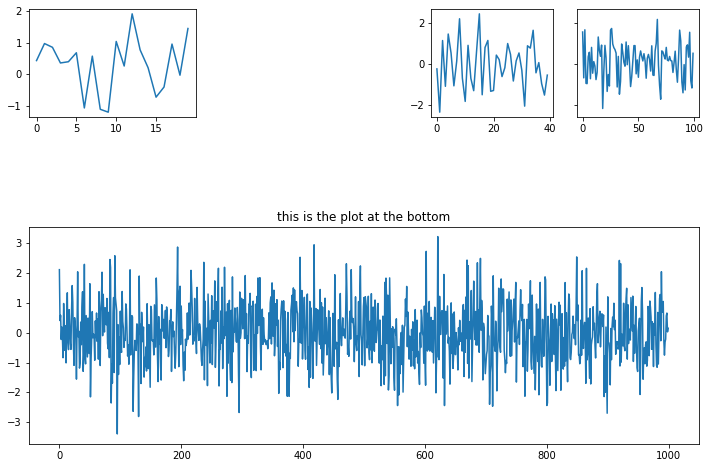

In [4]:
#make a figure canvas
fig = plt.figure(figsize=(12,8))

#define axes in a dictionary so you can refer to them by name when plotting
#note that the 'top_right_plot' is a 1x2 array of axes with shared y-axes
axes = {
    'top_left_plot':placeAxesOnGrid(fig,xspan=(0,0.25),yspan=(0,0.25)),
    'top_right_plot':placeAxesOnGrid(fig,xspan=(0.6,1),yspan=(0,0.25),dim=(1,2),sharey=True),
    'bottom_plot':placeAxesOnGrid(fig,xspan=(0,1),yspan=(0.5,1)),
}

#plot on the axes
axes['top_left_plot'].plot(np.random.randn(20))

#because the top right plot is an array, you need to index into it
axes['top_right_plot'][0].plot(np.random.randn(40))
axes['top_right_plot'][1].plot(np.random.randn(100))

# plot on the bottom axis and give it a title
axes['bottom_plot'].plot(np.random.randn(1000))
axes['bottom_plot'].set_title('this is the plot at the bottom')